<h1>Occupancy Detection Data Set</h1>
<p>Dataset imported from <a href = "https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+#">Occupancy Dataset</a></p>

<h2><li>Importing Necessary Libraries</li></h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

<h3><li>Importing csv(s)</li></h3>

In [61]:
dataset = pd.read_csv('datatraining.csv')
datatest1 = pd.read_csv('datatest.csv')
datatest2 = pd.read_csv('datatest2.csv')

In [62]:
dataset.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


<h2><li>The Data Set is the <b>Classification</b> Type problem</li></h2>
<p>As we can see, the dataset has <b>6 Independent</b> variables and <b>One Dependent variable.</b> of which variable <b>'Date'</b> is not an essential feature, so we are eliminating it from the essential features' list.</p>

In [73]:
X_train = dataset.iloc[:,1:6].values
y_train = dataset.iloc[:,-1].values
X_test1 = datatest1.iloc[:,1:6].values
y_test1 = datatest1.iloc[:,-1].values
X_test2 = datatest2.iloc[:,1:6].values
y_test2 = datatest2.iloc[:,-1].values

<h3><li>Let's Visualize the data using seaborn's pairplot</li></h3>

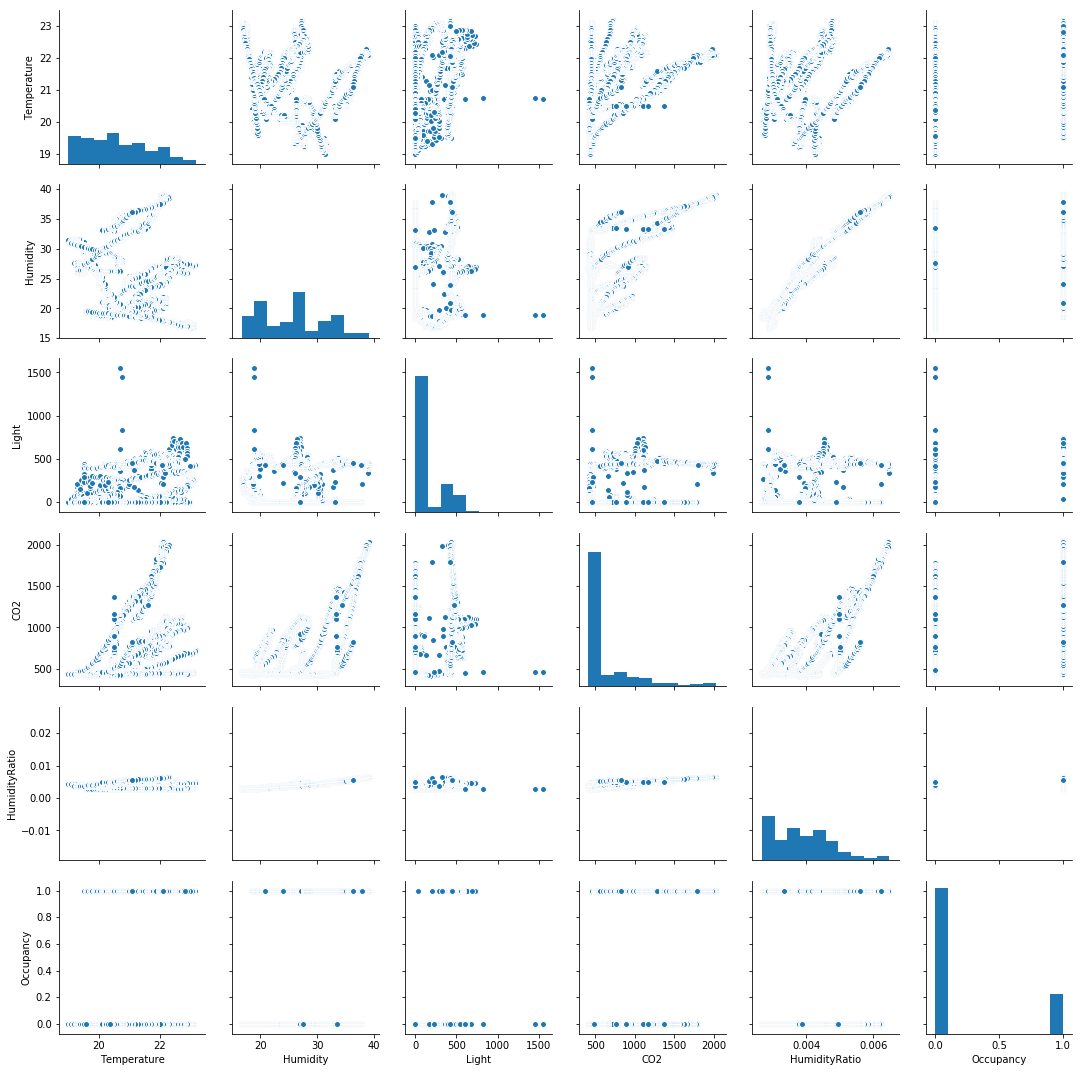

In [74]:
sb.pairplot(dataset)

<p>As from the diffrent plots, we can assume that, <b>Naive Bayes algorithm</b> or the <b>Logistic Regression Model</b> can be used to predict best results.</p>
<h1><li>Here we'll use <b>Naive Bayes</b> Algorithm</li></h1>

<h1>Data Preprocessing</h1>
<p>Now we'll scale down the independent variabes.</p>

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test1 = sc.transform(X_test1)
X_test2 = sc.transform(X_test2)

<h1>Model Training</h1>

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifierNB = GaussianNB()
classifierNB.fit(X_train,y_train)

<h1>Model Evaluation</h1>
We'll Evaluate the  <b>Naive Bayes Model</b> be using a <b>Confusion Matrix</b>.

In [ ]:
from sklearn.metrics import confusion_matrix

<h4><li>Evaluating the model using <b>First Data Set</b>.</li></h4>

In [92]:
cmDecisionNB1 = confusion_matrix(y_test1,classifierNB.predict(X_test1))
cmDecisionNB1

array([[1638,   55],
       [   5,  967]])

This <b>Confusion Matrix</b> depicts that we have an accuracy of <b>97.74%</b> on <b>First Data Set</b>.

<h4><li>Evaluating the model using <b>Second Data Set</b>.</li></h4>

In [93]:
cmDecisionNB2 = confusion_matrix(y_test2,classifierNB.predict(X_test2))
cmDecisionNB2

array([[7589,  114],
       [  14, 2035]])

This <b>Confusion Matrix</b> depicts that we have an accuracy of <b>98.68%</b> on <b>Second Data Set</b>.